In [1]:
import os
import sys
import glob
import pprint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
pd.__version__

'1.0.3'

In [3]:
tophits_summary_csvs = glob.glob("../gather_tophits/*/*summary.csv")
tophits_matches_csv = glob.glob("../gather_tophits/*/*matchinfo.csv")

In [4]:
summaryDF = pd.concat([pd.read_csv(csv, index_col=0).assign(filename=os.path.basename(csv)) for csv in tophits_summary_csvs])
matchesDF = pd.concat([pd.read_csv(csv, index_col=0).assign(filename=os.path.basename(csv)) for csv in tophits_matches_csv])

In [5]:
matchesDF

,incorrect lineage,no gather match,filename,lineage_match,num_matches
303.0,336.0,3.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,NaN,NaN
225.0,414.0,3.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,NaN,NaN
118.0,521.0,3.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,NaN,NaN
238.0,401.0,3.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,NaN,NaN
342.0,297.0,3.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,NaN,NaN
...,...,...,...,...,...
2963.0,135.0,NaN,gtdb_pep.rep_genus.protein_scaled100_k11.gathe...,NaN,NaN
3095.0,3.0,NaN,gtdb_pep.rep_genus.protein_scaled100_k11.gathe...,NaN,NaN
3097.0,1.0,NaN,gtdb_pep.rep_genus.protein_scaled100_k11.gathe...,NaN,NaN
NaN,NaN,3098.0,gtdb_pep.rep_genus.protein_scaled100_k11.gathe...,NaN,NaN


In [6]:
summaryDF.fillna(0, inplace=True)
# add new columns based on scaled, ksize etc in the filenames
summaryDF["scaled"]= summaryDF["filename"].str.extract(r"scaled(\d*)")
summaryDF["ksize"] = summaryDF["filename"].str.extract(r"k(\d*)")
summaryDF["input_molecule"] = summaryDF["filename"].str.extract(r"gtdb_(\w*)")
summaryDF["alphabet"] = summaryDF["filename"].str.extract(r"\w.(\w*)_scaled")
summaryDF["representative_at"] = summaryDF["filename"].str.extract(r"rep_(\w*).\w*_scaled")
summaryDF["alpha-ksize"] = summaryDF["alphabet"] + "-" + summaryDF["ksize"]

#steps_to_common_ancestor = {"species": 0, "genus": 1, "family": 2, "order": 3, "class": 4, "phylum": 5, "superkingdom": 6}
#distDF["steps to common ancestor"] = distDF.apply(lambda x: steps_to_common_ancestor[x["rank"]], axis=1)

summaryDF

,rank,percent_match,lineage,true_lineage,lineage_match,total_correct_lineages,total incorrect lineages,total no match,filename,scaled,ksize,input_molecule,alphabet,representative_at,alpha-ksize
accession,,,,,,,,,,,,,,,
GCA_002691795,superkingdom,0.014,d__Bacteria;p__Proteobacteria,"['d__Bacteria', 'p__Proteobacteria', 'c__Alpha...",correct lineage,601.0,41.0,0.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,1000,21,rna,nucleotide,order,nucleotide-21
GCA_002415485,superkingdom,0.011,d__Bacteria;p__Proteobacteria,"['d__Bacteria', 'p__Proteobacteria', 'c__Gamma...",correct lineage,601.0,41.0,0.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,1000,21,rna,nucleotide,order,nucleotide-21
GCA_001577215,superkingdom,0.002,d__Bacteria;p__Proteobacteria,"['d__Bacteria', 'p__Marinisomatota', 'c__AB16'...",correct lineage,601.0,41.0,0.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,1000,21,rna,nucleotide,order,nucleotide-21
GCA_001818235,superkingdom,0.004,d__Bacteria;p__Patescibacteria,"['d__Bacteria', 'p__Patescibacteria', 'c__ABY1...",correct lineage,601.0,41.0,0.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,1000,21,rna,nucleotide,order,nucleotide-21
GCA_003220155,superkingdom,0.005,d__Bacteria;p__Verrucomicrobiota,"['d__Bacteria', 'p__Verrucomicrobiota', 'c__Ve...",correct lineage,601.0,41.0,0.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,1000,21,rna,nucleotide,order,nucleotide-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCA_003533405,species,0,no match,"['d__Bacteria', 'p__Firmicutes_A', 'c__Clostri...",no gather match,0.0,0.0,3098.0,gtdb_pep.rep_genus.dayhoff_scaled100_k19.gathe...,100,19,pep,dayhoff,genus,dayhoff-19
GCA_002407725,species,0,no match,"['d__Bacteria', 'p__Firmicutes_A', 'c__Clostri...",no gather match,0.0,0.0,3098.0,gtdb_pep.rep_genus.dayhoff_scaled100_k19.gathe...,100,19,pep,dayhoff,genus,dayhoff-19
GCF_900100095,species,0,no match,"['d__Bacteria', 'p__Firmicutes_A', 'c__Clostri...",no gather match,0.0,0.0,3098.0,gtdb_pep.rep_genus.dayhoff_scaled100_k19.gathe...,100,19,pep,dayhoff,genus,dayhoff-19


In [110]:
summaryDF["sensitivity"] = summaryDF["total_correct_lineages"] / (summaryDF["total_correct_lineages"] + summaryDF["total incorrect lineages"] + summaryDF["total no match"] )
summaryDF["precision"] = summaryDF["total_correct_lineages"] / (summaryDF["total_correct_lineages"] + summaryDF["total incorrect lineages"])
summaryDF["F1_score"] = 2 * ((summaryDF["sensitivity"] * summaryDF["precision"]) / (summaryDF["sensitivity"] + summaryDF["precision"]))
summaryDF = summaryDF[(summaryDF["rank"]!="species")]


In [111]:
summaryDF

,rank,percent_match,lineage,true_lineage,lineage_match,total_correct_lineages,total incorrect lineages,total no match,filename,scaled,ksize,input_molecule,alphabet,representative_at,alpha-ksize,classification_accuracy,sensitivity,precision,F1_score
accession,,,,,,,,,,,,,,,,,,,
GCA_002691795,superkingdom,0.014,d__Bacteria;p__Proteobacteria,"['d__Bacteria', 'p__Proteobacteria', 'c__Alpha...",correct lineage,601.0,41.0,0.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,1000,21,rna,nucleotide,order,nucleotide-21,0.936137,0.936137,0.936137,0.936137
GCA_002415485,superkingdom,0.011,d__Bacteria;p__Proteobacteria,"['d__Bacteria', 'p__Proteobacteria', 'c__Gamma...",correct lineage,601.0,41.0,0.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,1000,21,rna,nucleotide,order,nucleotide-21,0.936137,0.936137,0.936137,0.936137
GCA_001577215,superkingdom,0.002,d__Bacteria;p__Proteobacteria,"['d__Bacteria', 'p__Marinisomatota', 'c__AB16'...",correct lineage,601.0,41.0,0.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,1000,21,rna,nucleotide,order,nucleotide-21,0.936137,0.936137,0.936137,0.936137
GCA_001818235,superkingdom,0.004,d__Bacteria;p__Patescibacteria,"['d__Bacteria', 'p__Patescibacteria', 'c__ABY1...",correct lineage,601.0,41.0,0.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,1000,21,rna,nucleotide,order,nucleotide-21,0.936137,0.936137,0.936137,0.936137
GCA_003220155,superkingdom,0.005,d__Bacteria;p__Verrucomicrobiota,"['d__Bacteria', 'p__Verrucomicrobiota', 'c__Ve...",correct lineage,601.0,41.0,0.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,1000,21,rna,nucleotide,order,nucleotide-21,0.936137,0.936137,0.936137,0.936137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCA_003533405,genus,0.16,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,"['d__Bacteria', 'p__Firmicutes_A', 'c__Clostri...",correct lineage,2946.0,152.0,0.0,gtdb_pep.rep_genus.dayhoff_scaled100_k19.gathe...,100,19,pep,dayhoff,genus,dayhoff-19,0.950936,0.950936,0.950936,0.950936
GCA_002407725,genus,0.065,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__C...,"['d__Bacteria', 'p__Firmicutes_A', 'c__Clostri...",correct lineage,2946.0,152.0,0.0,gtdb_pep.rep_genus.dayhoff_scaled100_k19.gathe...,100,19,pep,dayhoff,genus,dayhoff-19,0.950936,0.950936,0.950936,0.950936
GCF_900100095,genus,0.069,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,"['d__Bacteria', 'p__Firmicutes_A', 'c__Clostri...",correct lineage,2946.0,152.0,0.0,gtdb_pep.rep_genus.dayhoff_scaled100_k19.gathe...,100,19,pep,dayhoff,genus,dayhoff-19,0.950936,0.950936,0.950936,0.950936


In [101]:
summaryDF[(summaryDF["input_molecule"]=="rna") & (summaryDF["rank"] == "order")]

,rank,percent_match,lineage,true_lineage,lineage_match,total_correct_lineages,total incorrect lineages,total no match,filename,scaled,ksize,input_molecule,alphabet,representative_at,alpha-ksize,classification_accuracy,sensitivity,precision
accession,,,,,,,,,,,,,,,,,,
GCA_002691795,order,0.010,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,"['d__Bacteria', 'p__Proteobacteria', 'c__Alpha...",incorrect lineage,238.0,401.0,3.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,1000,21,rna,nucleotide,order,nucleotide-21,0.370717,0.370717,0.372457
GCA_002415485,order,0.002,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,"['d__Bacteria', 'p__Proteobacteria', 'c__Gamma...",correct lineage,238.0,401.0,3.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,1000,21,rna,nucleotide,order,nucleotide-21,0.370717,0.370717,0.372457
GCA_001577215,order,0.001,d__Bacteria;p__Patescibacteria;c__Paceibacteri...,"['d__Bacteria', 'p__Marinisomatota', 'c__AB16'...",incorrect lineage,238.0,401.0,3.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,1000,21,rna,nucleotide,order,nucleotide-21,0.370717,0.370717,0.372457
GCA_001818235,order,0.002,d__Bacteria;p__Patescibacteria;c__ABY1;o__XYB2...,"['d__Bacteria', 'p__Patescibacteria', 'c__ABY1...",incorrect lineage,238.0,401.0,3.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,1000,21,rna,nucleotide,order,nucleotide-21,0.370717,0.370717,0.372457
GCA_003220155,order,0.004,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,"['d__Bacteria', 'p__Verrucomicrobiota', 'c__Ve...",correct lineage,238.0,401.0,3.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,1000,21,rna,nucleotide,order,nucleotide-21,0.370717,0.370717,0.372457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCA_002722845,order,0.008,d__Bacteria;p__Myxococcota;c__UBA727;o__UBA415...,"['d__Bacteria', 'p__Myxococcota', 'c__UBA727',...",correct lineage,238.0,401.0,3.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,1000,21,rna,nucleotide,order,nucleotide-21,0.370717,0.370717,0.372457
GCF_000714935,order,0.001,d__Bacteria;p__Firmicutes_I;c__Bacilli_A;o__Br...,"['d__Bacteria', 'p__Firmicutes_K', 'c__Alicycl...",incorrect lineage,238.0,401.0,3.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,1000,21,rna,nucleotide,order,nucleotide-21,0.370717,0.370717,0.372457
GCA_003134755,order,0.004,d__Bacteria;p__Actinobacteriota;c__Actinobacte...,"['d__Bacteria', 'p__Actinobacteriota', 'c__Act...",incorrect lineage,238.0,401.0,3.0,gtdb_rna.rep_order.nucleotide_scaled1000_k21.g...,1000,21,rna,nucleotide,order,nucleotide-21,0.370717,0.370717,0.372457


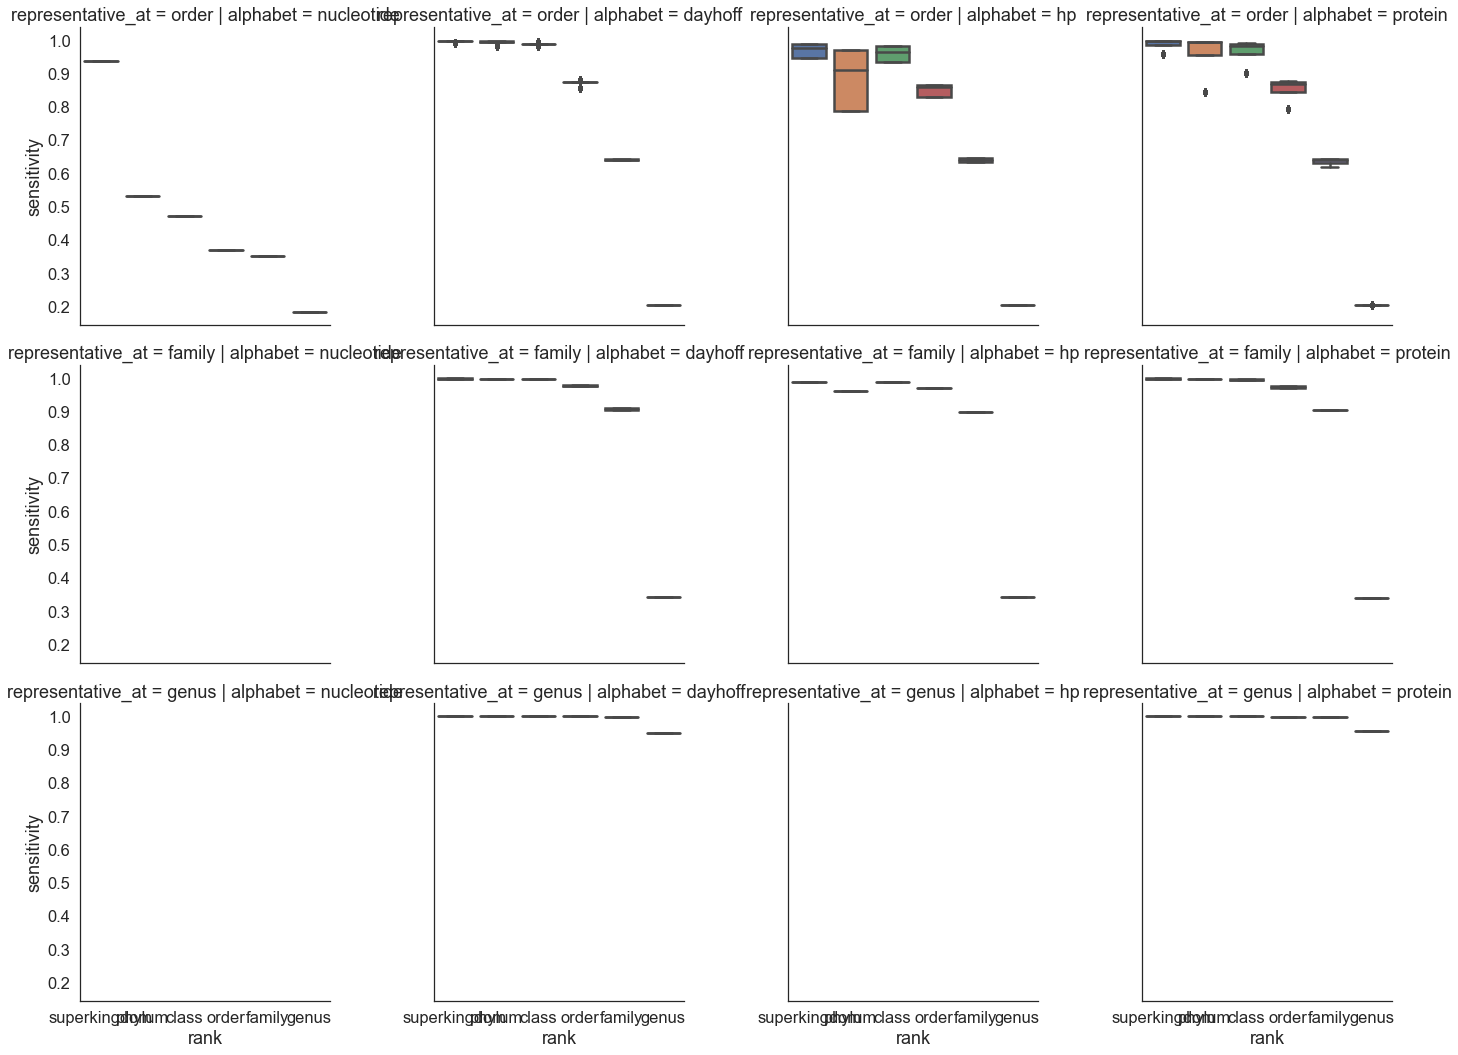

In [112]:
g = sns.catplot(data=summaryDF,x="rank", y="sensitivity", kind="box",  col="alphabet", row= "representative_at")
#g.set(yscale="log")

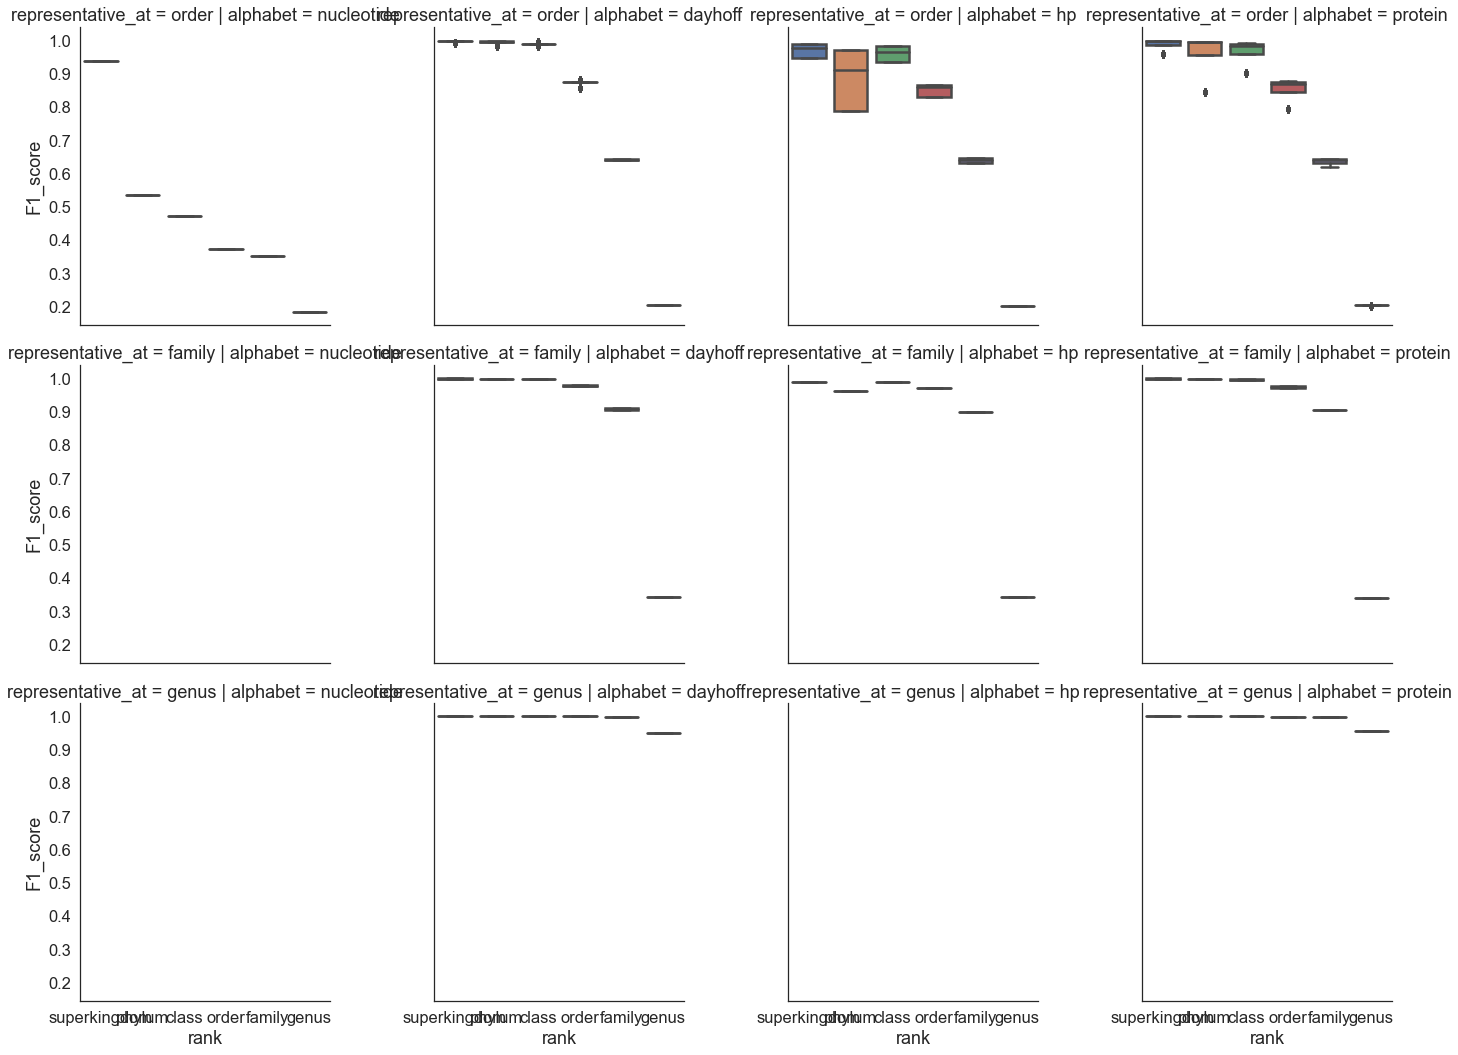

In [115]:
g = sns.catplot(data=summaryDF,x="rank", y="F1_score", kind="box",  col="alphabet", row= "representative_at")


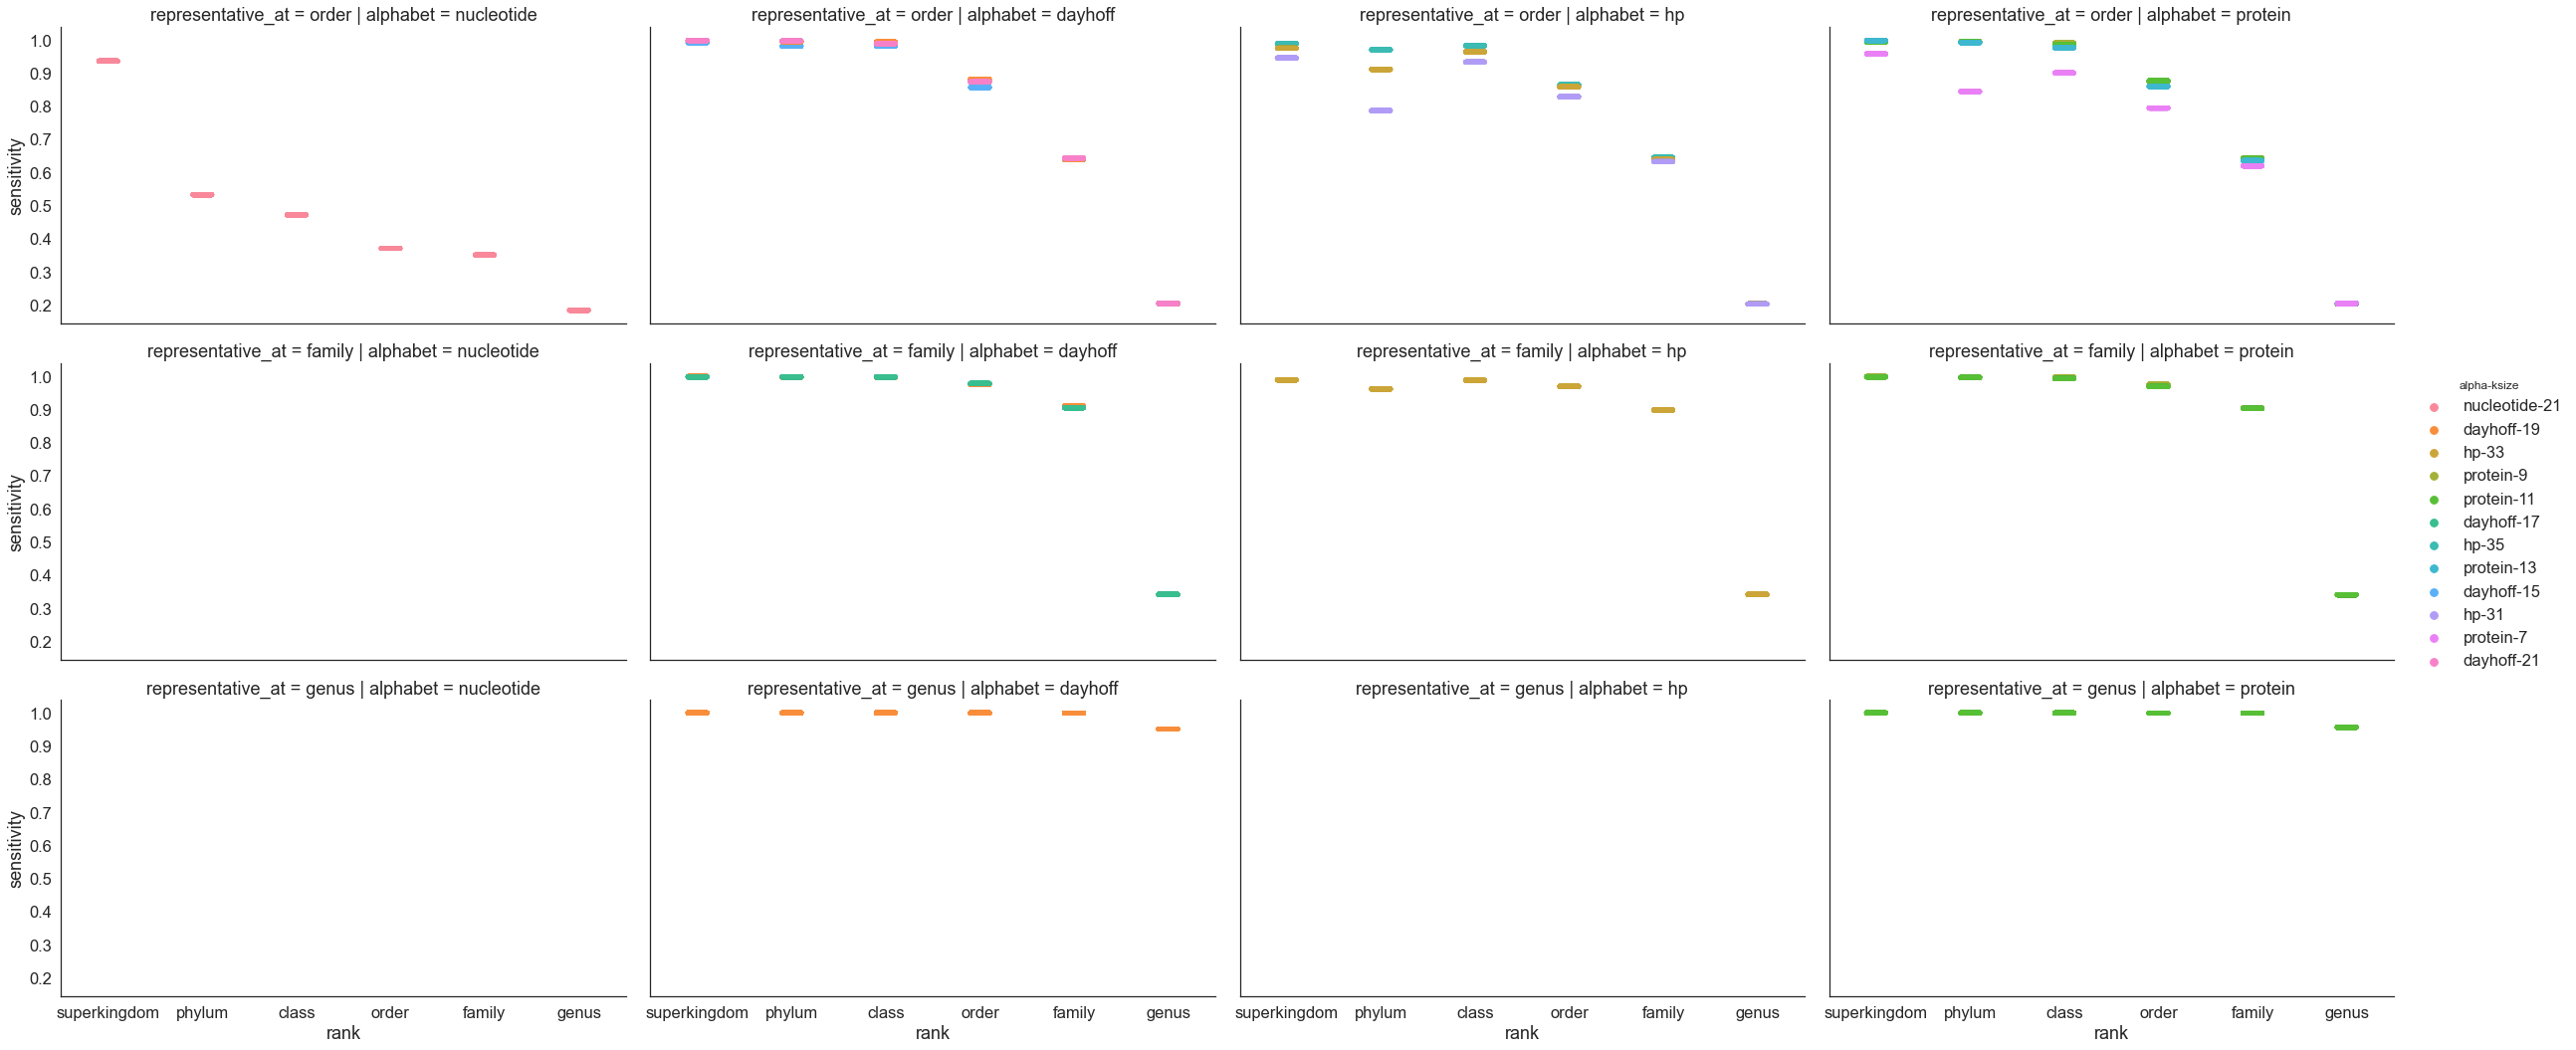

In [105]:
#g = sns.catplot(data=summaryDF,x="rank", y="sensitivity", col="alphabet", hue="ksize", row="representative_at")
g = sns.catplot(data=summaryDF,x="rank", y="sensitivity",  col="alphabet", hue="alpha-ksize", row="representative_at", aspect=1.7)
#g.savefig("sensitivity-representative.gather.all.pdf")

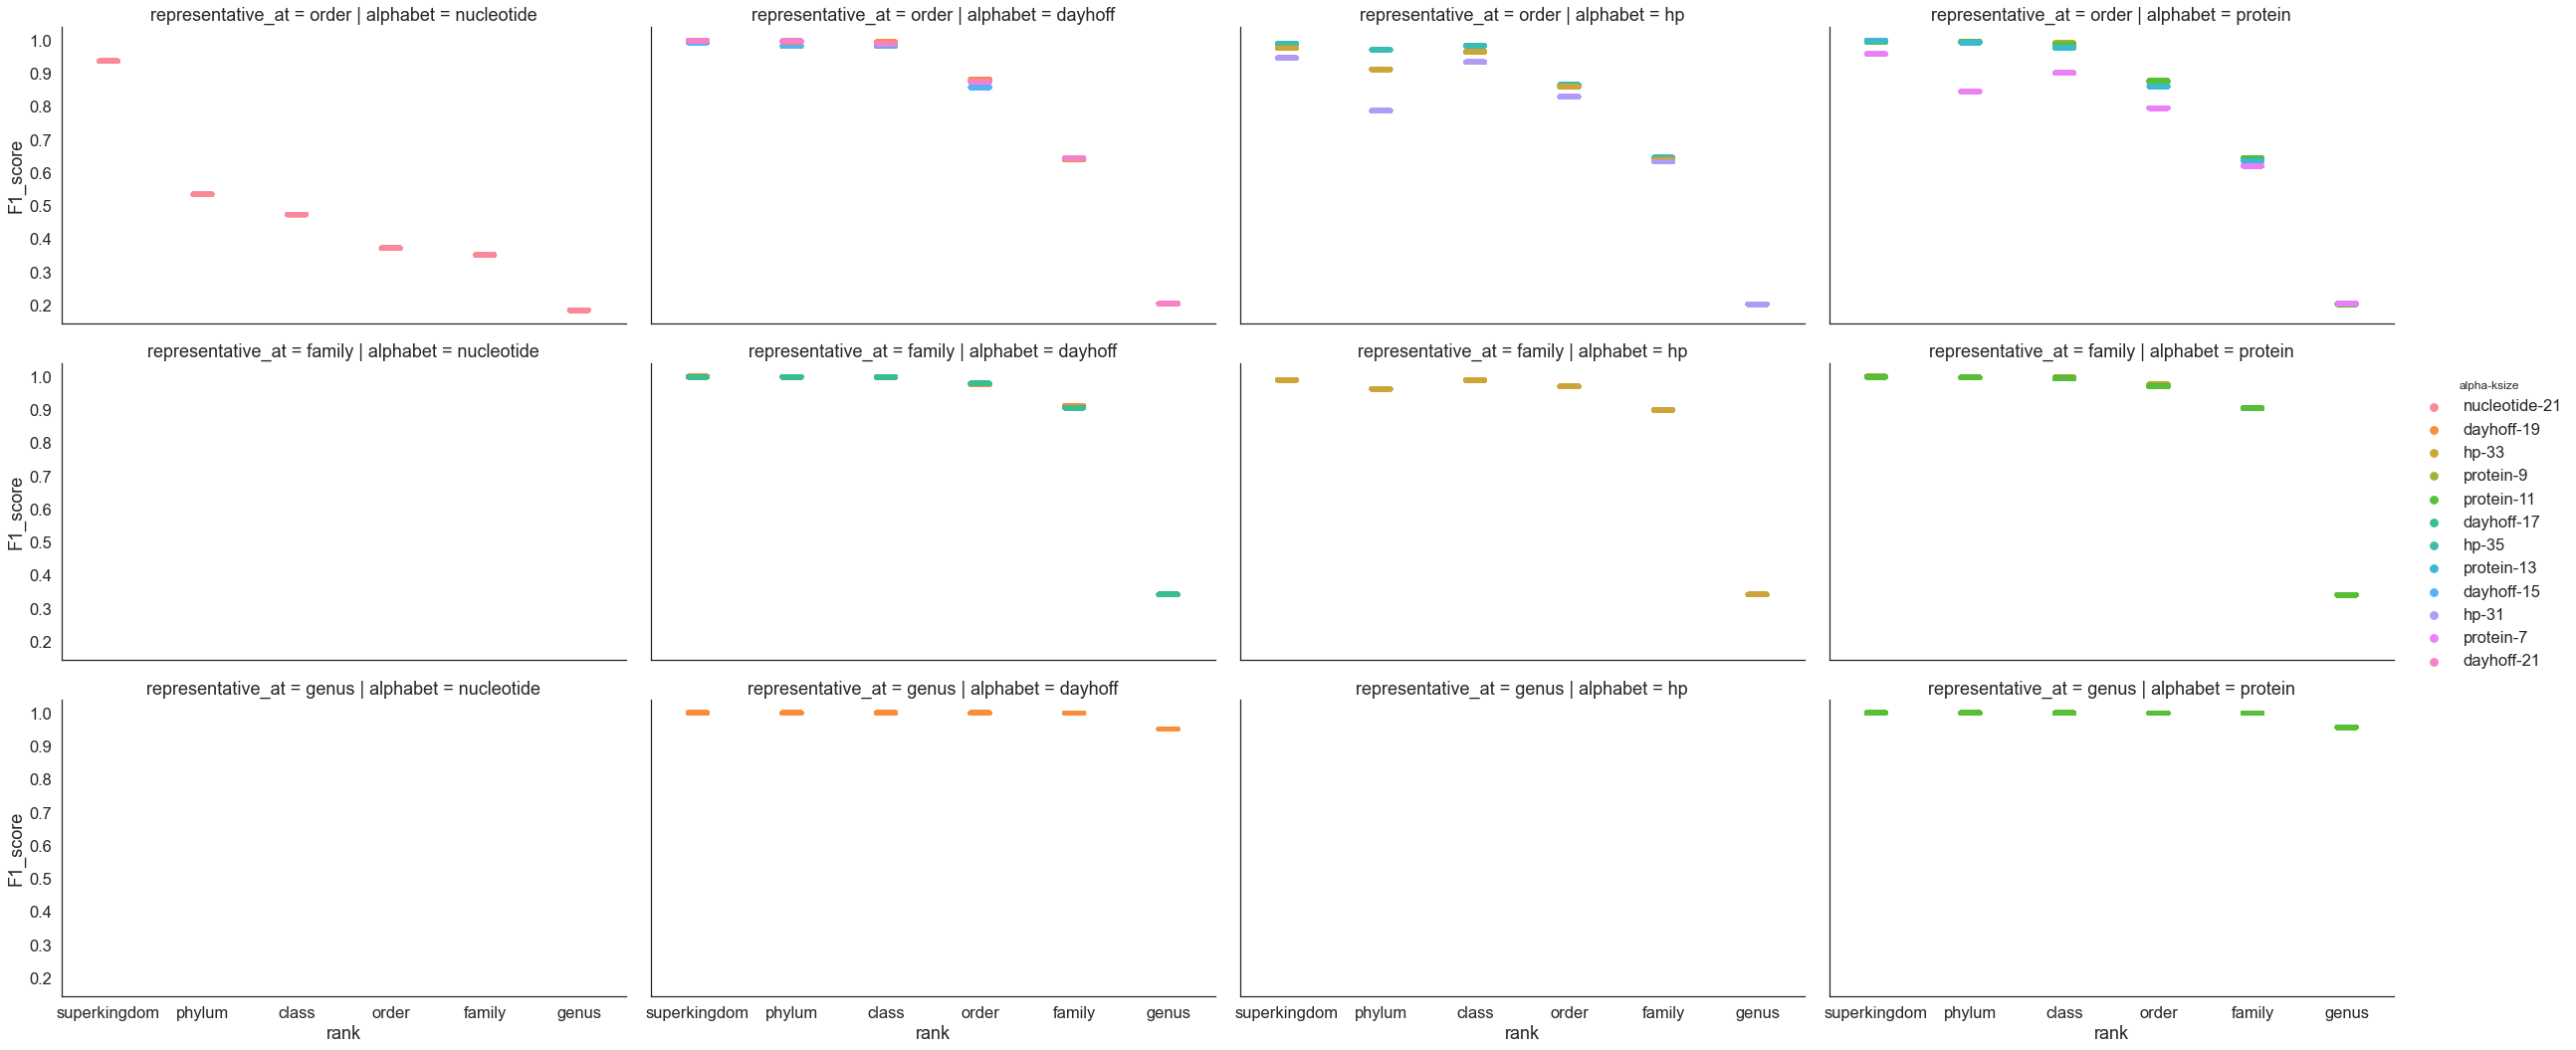

In [116]:
g = sns.catplot(data=summaryDF,x="rank", y="F1_score",  col="alphabet", hue="alpha-ksize", row="representative_at", aspect=1.7)


In [136]:
rep_order =summaryDF[summaryDF["representative_at"] == "order"]
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

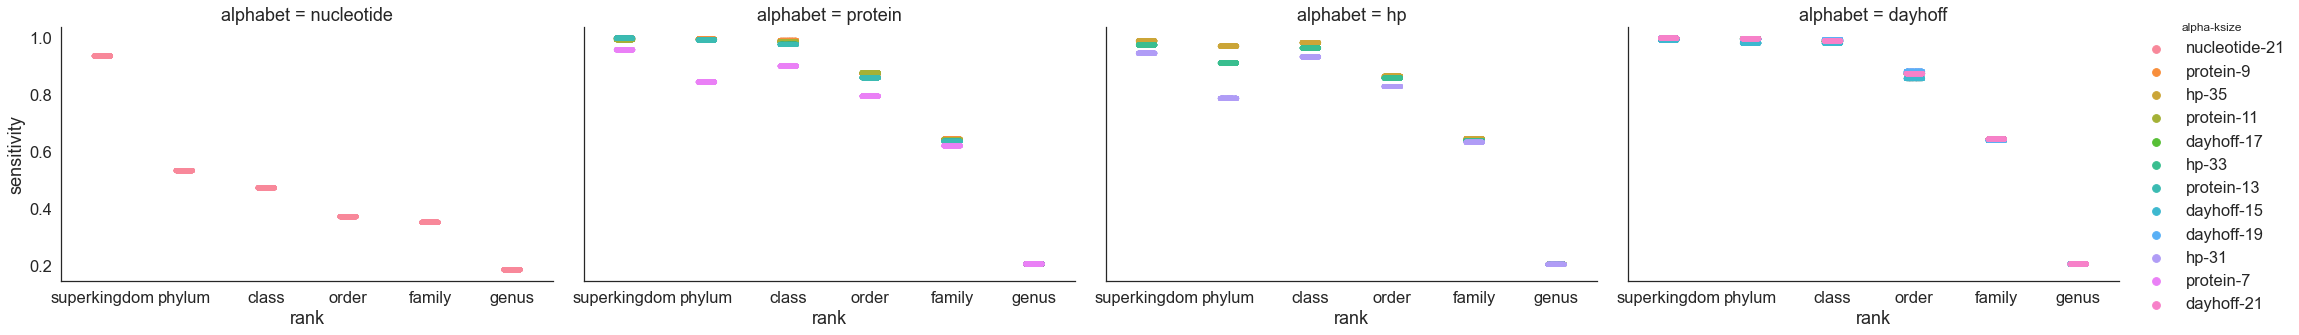

In [150]:
g = sns.catplot(data=rep_order,x="rank", y="sensitivity",  col="alphabet", hue="alpha-ksize", aspect=1.5)
g.savefig("sensitivity.rep-order.gather.png")


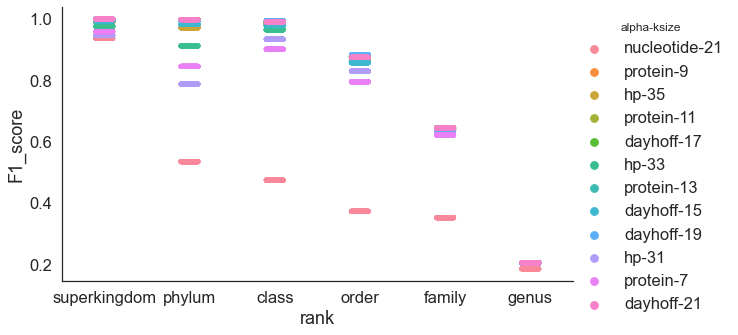

In [142]:
g = sns.catplot(data=rep_order,x="rank", y="F1_score", hue="alpha-ksize", aspect=1.7)


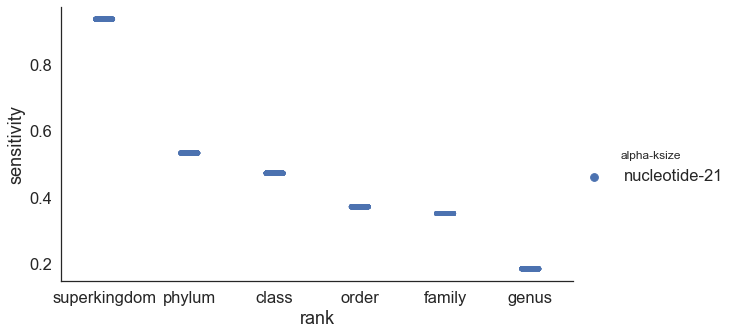

In [146]:
g = sns.catplot(data=rep_order[rep_order["alphabet"] == "nucleotide"],x="rank", y="sensitivity", hue="alpha-ksize", aspect=1.7)

### Select best alphabets, ksizes
than, plot just those on the same graph. Then can have one of these graphs per rep @ order, family, genus 

 - best ksize for protein (of 7,9,11,13) = **11**
 - best ksize for hp (of 31,33,35) = **35**
 - best ksize for dayhoff (of 15,17,19,21) = **19** BUT all are much closer together than the other alpha-ksize combinations. k=21 may be better at family level?



In [121]:
bestK = summaryDF[summaryDF["ksize"].isin(["11","19","35"]) & summaryDF["scaled"].isin(["100"])]


In [122]:
sns.set()
sns.set_style("white")
#sns.set_context("poster")
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})


In [123]:
g = sns.catplot(data=bestK[~bestK["rank"].isin(["species"])],x="rank", y="sensitivity", hue="alpha-ksize", col="representative_at", alpha=0.3)
g.savefig("classification-accuracy-representative-lca.gather.pdf")


ValueError: min() arg is an empty sequence

In [133]:
sns.set()
sns.set_style("white")
#sns.set_context("poster")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

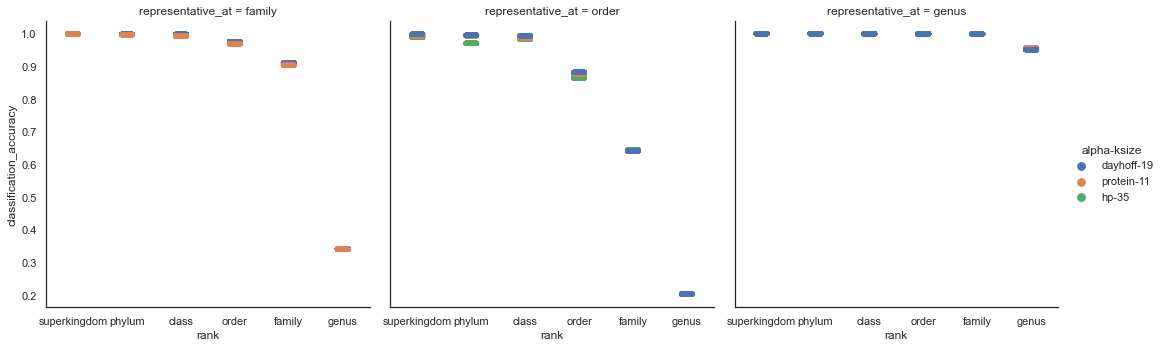

In [125]:
g = sns.catplot(data=bestK[~bestK["rank"].isin(["species"])],x="rank", y="classification_accuracy", hue="alpha-ksize", col="representative_at")


In [126]:
bestK_genus = bestK[bestK["representative_at"] == "genus"]

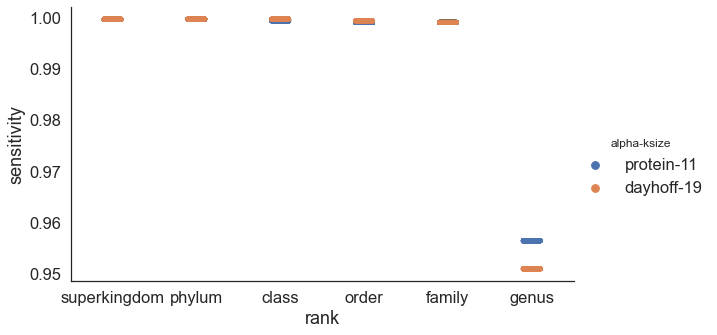

In [134]:
g = sns.catplot(data=bestK_genus[~bestK_genus["rank"].isin(["species"])],x="rank", y="sensitivity", hue="alpha-ksize", aspect=1.7)
g.savefig("protein-sensitivity.rep-genus.gather.png")



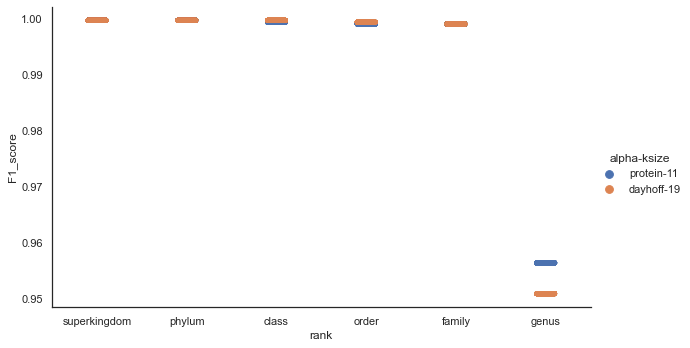

In [132]:
g = sns.catplot(data=bestK_genus[~bestK_genus["rank"].isin(["species"])],x="rank", y="F1_score", hue="alpha-ksize", aspect=1.7)
g.savefig("protein-f1-score.rep-genus.gather.png")


In [17]:
## Assess translate results

In [18]:

translate_summary_csvs = glob.glob("../gather_tophits/gtdb*gather_tophits.csv")
translate_matches_csv = glob.glob("../gather_tophits/gtdb*matchinfo.csv")

In [19]:
translate_summaryDF = pd.concat([pd.read_csv(csv, index_col=0).assign(filename=os.path.basename(csv)) for csv in translate_summary_csvs])
translate_matchesDF = pd.concat([pd.read_csv(csv, index_col=0).assign(filename=os.path.basename(csv)) for csv in translate_matches_csv])

In [20]:
translate_summaryDF.fillna(0, inplace=True)
# add new columns based on scaled, ksize etc in the filenames
#translate_summaryDF["scaled"]= translate_summaryDF["filename"].str.extract(r"scaled(\d*)")
translate_summaryDF["scaled"]= 1000
translate_summaryDF["ksize"] = translate_summaryDF["filename"].str.extract(r"k(\d*)")
translate_summaryDF["input_molecule"] = translate_summaryDF["filename"].str.extract(r"gtdb_(\w*)")
translate_summaryDF["alphabet"] = translate_summaryDF["filename"].str.extract(r"gtdb_\w*.rep_\w*.translate_(\w*)")
translate_summaryDF["representative_at"] = translate_summaryDF["filename"].str.extract(r"rep_(\w*).\w*")
translate_summaryDF["alpha-ksize"] = translate_summaryDF["alphabet"] + "-" + translate_summaryDF["ksize"]

#steps_to_common_ancestor = {"species": 0, "genus": 1, "family": 2, "order": 3, "class": 4, "phylum": 5, "superkingdom": 6}
#distDF["steps to common ancestor"] = distDF.apply(lambda x: steps_to_common_ancestor[x["rank"]], axis=1)

translate_summaryDF

,rank,percent_match,lineage,true_lineage,lineage_match,total_correct_lineages,total incorrect lineages,total no match,filename,scaled,ksize,input_molecule,alphabet,representative_at,alpha-ksize
accession,,,,,,,,,,,,,,,
GCA_002697725,superkingdom,0.105,d__Bacteria;p__Proteobacteria,"['d__Bacteria', 'p__Proteobacteria', 'c__Alpha...",correct lineage,3097.0,1.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11
GCA_002441475,superkingdom,0.045,d__Bacteria;p__Bacteroidota,"['d__Bacteria', 'p__Bacteroidota', 'c__Bactero...",correct lineage,3097.0,1.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11
GCA_002316545,superkingdom,0.117,d__Bacteria;p__Patescibacteria,"['d__Bacteria', 'p__Patescibacteria', 'c__Sacc...",correct lineage,3097.0,1.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11
GCF_000828655,superkingdom,0.048,d__Bacteria;p__Thermotogota,"['d__Bacteria', 'p__Thermotogota', 'c__Thermot...",correct lineage,3097.0,1.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11
GCA_002720485,superkingdom,0.047,d__Bacteria;p__Actinobacteriota,"['d__Bacteria', 'p__Actinobacteriota', 'c__Aci...",correct lineage,3097.0,1.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_000022525,species,0.000,no match,"['d__Bacteria', 'p__Proteobacteria', 'c__Alpha...",no gather match,0.0,0.0,3098.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,19,rna,dayhoff,genus,dayhoff-19
GCA_002689105,species,0.000,no match,"['d__Bacteria', 'p__Proteobacteria', 'c__Alpha...",no gather match,0.0,0.0,3098.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,19,rna,dayhoff,genus,dayhoff-19
GCA_002440625,species,0.000,no match,"['d__Bacteria', 'p__Proteobacteria', 'c__Alpha...",no gather match,0.0,0.0,3098.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,19,rna,dayhoff,genus,dayhoff-19


In [81]:
translate_summaryDF["sensitivity"] = translate_summaryDF["total_correct_lineages"] / (translate_summaryDF["total_correct_lineages"] + translate_summaryDF["total incorrect lineages"] + translate_summaryDF["total no match"] )

In [84]:
translate_summaryDF = translate_summaryDF[(translate_summaryDF["rank"]!="species")]

In [82]:
translate_summaryDF[(translate_summaryDF["input_molecule"]=="rna") & (translate_summaryDF["rank"] == "order")]

,rank,percent_match,lineage,true_lineage,lineage_match,total_correct_lineages,total incorrect lineages,total no match,filename,scaled,ksize,input_molecule,alphabet,representative_at,alpha-ksize,classification_accuracy,sensitivity
accession,,,,,,,,,,,,,,,,,
GCA_002697725,order,0.100,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,"['d__Bacteria', 'p__Proteobacteria', 'c__Alpha...",correct lineage,3094.0,4.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.998709,0.998709
GCA_002441475,order,0.042,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,"['d__Bacteria', 'p__Bacteroidota', 'c__Bactero...",correct lineage,3094.0,4.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.998709,0.998709
GCA_002316545,order,0.116,d__Bacteria;p__Patescibacteria;c__Saccharimona...,"['d__Bacteria', 'p__Patescibacteria', 'c__Sacc...",correct lineage,3094.0,4.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.998709,0.998709
GCF_000828655,order,0.047,d__Bacteria;p__Thermotogota;c__Thermotogae;o__...,"['d__Bacteria', 'p__Thermotogota', 'c__Thermot...",correct lineage,3094.0,4.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.998709,0.998709
GCA_002720485,order,0.042,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,"['d__Bacteria', 'p__Actinobacteriota', 'c__Aci...",correct lineage,3094.0,4.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.998709,0.998709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_000022525,order,0.075,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,"['d__Bacteria', 'p__Proteobacteria', 'c__Alpha...",correct lineage,3092.0,6.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,19,rna,dayhoff,genus,dayhoff-19,0.998063,0.998063
GCA_002689105,order,0.054,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,"['d__Bacteria', 'p__Proteobacteria', 'c__Alpha...",incorrect lineage,3092.0,6.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,19,rna,dayhoff,genus,dayhoff-19,0.998063,0.998063
GCA_002440625,order,0.082,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,"['d__Bacteria', 'p__Proteobacteria', 'c__Alpha...",correct lineage,3092.0,6.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,19,rna,dayhoff,genus,dayhoff-19,0.998063,0.998063


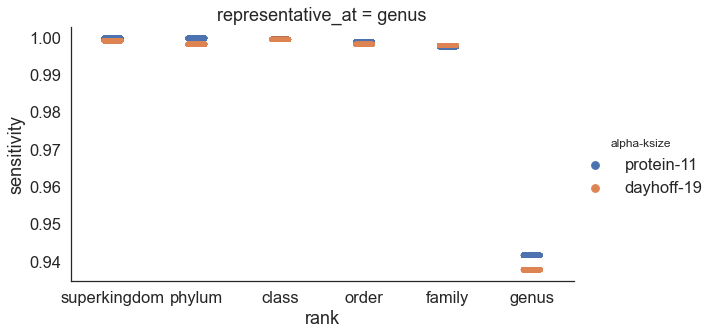

In [119]:
g = sns.catplot(data=translate_summaryDF,x="rank", y="sensitivity",  hue="alpha-ksize", row="representative_at", aspect=1.7) #col="alphabet", 
g.savefig("translate-sensitivity.rep-genus.gather.png")
#g.savefig("translate-sensitivity.rep-genus.gather.pdf")

In [97]:
g = sns.catplot(data=summaryDF,x="rank", y="sensitivity",  col="alphabet", hue="alpha-ksize", row="representative_at", aspect=1.7)


ValueError: Could not interpret input 'sensitivity'

# Calculate Metrics

- precision = TP/ (TP + FP)
- recall = TP/ (TP + FN)
- F1 = 2 * (precision * recall) / (precision + recall)

- total_correct_linages == true positives
- total_incorrect_lineages == false negatives
- total_no_match

all samples = total_correct + total incorrect + total no match

In [73]:
#metricDF = summaryDF.groupby(["filename", "lineage_match"])

# only use the "representative at genus" databases
gsummaryDF = summaryDF[summaryDF["representative_at"] == "genus"]

# species will always be wrong (correct sp is not in database) - let's remove
gsummaryDF = gsummaryDF[gsummaryDF["rank"] != "species"]

In [74]:
metricDF = gsummaryDF.groupby(["filename", "scaled", "ksize","input_molecule","alphabet","representative_at","alpha-ksize", "rank", "classification_accuracy"]).sum()[["total_correct_lineages", "total incorrect lineages", "total no match"]]
metricDF["sensitivity"] = metricDF["total_correct_lineages"]/(metricDF["total_correct_lineages"] + metricDF["total incorrect lineages"] + metricDF["total no match"])
metricDF["precision"] = metricDF["total_correct_lineages"]/(metricDF["total_correct_lineages"] + metricDF["total incorrect lineages"])
metricDF["F1_score"] = 2 * ((metricDF["sensitivity"] * metricDF["precision"]) / (metricDF["sensitivity"] + metricDF["precision"]))

In [75]:
metricDF

total_correct_lineages  \
filename                                           scaled ksize input_molecule alphabet representative_at alpha-ksize rank         classification_accuracy                           
gtdb_pep.rep_genus.dayhoff_scaled100_k19.gather... 100    19    pep            dayhoff  genus             dayhoff-19  class        0.999677                              9594506.0   
                                                                                                                      family       0.999032                              9588310.0   
                                                                                                                      genus        0.950936                              9126708.0   
                                                                                                                      order        0.999354                              9591408.0   
                                                                                                                      phylum       0.999677                              9594506.0   
                                                                                                                      superkingdom 0.999677                              9594506.0   
gtdb_pep.rep_genus.protein_scaled100_k11.gather... 100    11    pep            protein  genus             protein-11  class        0.999354                              9591408.0   
                                                                                                                      family       0.999032                              9588310.0   
                                                                                                                      genus        0.956423                              9179374.0   
                                                                                                                      order        0.999032                              9588310.0   
                                                                                                                      phylum       0.999677                              9594506.0   
                                                                                                                      superkingdom 0.999677                              9594506.0   

                                                                                                                                                            total incorrect lineages  \
filename                                           scaled ksize input_molecule alphabet representative_at alpha-ksize rank         classification_accuracy                             
gtdb_pep.rep_genus.dayhoff_scaled100_k19.gather... 100    19    pep            dayhoff  genus             dayhoff-19  class        0.999677                                   3098.0   
                                                                                                                      family       0.999032                                   9294.0   
                                                                                                                      genus        0.950936                                 470896.0   
                                                                                                                      order        0.999354                                   6196.0   
                                                                                                                      phylum       0.999677                                   3098.0   
                                                                                                                      superkingdom 0.999677                                   3098.0   
gtdb_pep.rep_genus.protein_scaled100_k11.gather... 100    11    pep            protein  genus             protein-11  class        0.99

In [72]:
tg_summaryDF = translate_summaryDF[translate_summaryDF["representative_at"] == "genus"]
tg_summaryDF=tg_summaryDF[tg_summaryDF["rank"] != "species"]

In [76]:
tg_metricDF = tg_summaryDF.groupby(["filename", "scaled", "ksize","input_molecule","alphabet","representative_at","alpha-ksize", "rank", "classification_accuracy"]).sum()[["total_correct_lineages", "total incorrect lineages", "total no match"]]
tg_metricDF["sensitivity"] = tg_metricDF["total_correct_lineages"]/(tg_metricDF["total_correct_lineages"] + tg_metricDF["total incorrect lineages"] + tg_metricDF["total no match"])
tg_metricDF["precision"] = tg_metricDF["total_correct_lineages"]/(tg_metricDF["total_correct_lineages"] + tg_metricDF["total incorrect lineages"])
tg_metricDF["F1_score"] = 2 * ((tg_metricDF["sensitivity"] * tg_metricDF["precision"]) / (tg_metricDF["sensitivity"] + tg_metricDF["precision"]))

In [77]:
tg_metricDF

total_correct_lineages  \
filename                                           scaled ksize input_molecule alphabet representative_at alpha-ksize rank         classification_accuracy                           
gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.transl... 1000   19    rna            dayhoff  genus             dayhoff-19  class        0.999354                              9591408.0   
                                                                                                                      family       0.997740                              9575918.0   
                                                                                                                      genus        0.937702                              8999690.0   
                                                                                                                      order        0.998063                              9579016.0   
                                                                                                                      phylum       0.998063                              9579016.0   
                                                                                                                      superkingdom 0.999032                              9588310.0   
gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.transl... 1000   11    rna            protein  genus             protein-11  class        0.999354                              9591408.0   
                                                                                                                      family       0.997418                              9572820.0   
                                                                                                                      genus        0.941575                              9036866.0   
                                                                                                                      order        0.998709                              9585212.0   
                                                                                                                      phylum       0.999677                              9594506.0   
                                                                                                                      superkingdom 0.999677                              9594506.0   

                                                                                                                                                            total incorrect lineages  \
filename                                           scaled ksize input_molecule alphabet representative_at alpha-ksize rank         classification_accuracy                             
gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.transl... 1000   19    rna            dayhoff  genus             dayhoff-19  class        0.999354                                   6196.0   
                                                                                                                      family       0.997740                                  21686.0   
                                                                                                                      genus        0.937702                                 597914.0   
                                                                                                                      order        0.998063                                  18588.0   
                                                                                                                      phylum       0.998063                                  18588.0   
                                                                                                                      superkingdom 0.999032                                   9294.0   
gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.transl... 1000   11    rna            protein  genus             protein-11  class        0.99

array(['protein-11', 'dayhoff-19'], dtype=object)

# Let's dig into some incorrectly classified genomes

** first digging into protein-11 misclassified **

In [17]:
translate_summaryDF["classification_accuracy"]

accession
GCA_002697725    0.999677
GCA_002441475    0.999677
GCA_002316545    0.999677
GCF_000828655    0.999677
GCA_002720485    0.999677
                   ...   
GCF_000022525    0.000000
GCA_002689105    0.000000
GCA_002440625    0.000000
GCF_000582685    0.000000
GCA_002419385    0.000000
Name: classification_accuracy, Length: 43372, dtype: float64

In [18]:
translate_matchesDF

,correct lineage,incorrect lineage,no gather match,filename
rank,,,,
class,3096.0,2.0,NaN,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...
family,3090.0,8.0,NaN,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...
genus,2917.0,181.0,NaN,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...
order,3094.0,4.0,NaN,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...
phylum,3097.0,1.0,NaN,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...
species,NaN,NaN,3098.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...
superkingdom,3097.0,1.0,NaN,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...
class,3096.0,2.0,NaN,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...
family,3091.0,7.0,NaN,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...


## Incorrect at superkingdom level

In [28]:
translate_summaryDF[(translate_summaryDF["lineage_match"] == "incorrect lineage") & (translate_summaryDF["alphabet"] == "protein") & (translate_summaryDF["rank"] == "superkingdom")]

,rank,percent_match,lineage,true_lineage,lineage_match,total_correct_lineages,total incorrect lineages,total no match,filename,scaled,ksize,input_molecule,alphabet,representative_at,alpha-ksize,classification_accuracy
accession,,,,,,,,,,,,,,,,
GCA_002689105,superkingdom,0.045,d__Archaea;p__Thermoplasmatota,"['d__Bacteria', 'p__Proteobacteria', 'c__Alpha...",incorrect lineage,3097.0,1.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.999677


### GCA_002689105

GCA_002689105: new GTDB taxonomy for release 95??
    
GTDB lineage (https://gtdb.ecogenomic.org/searches?q=GCA_002689105&s=al):
    d__Archaea; 
    p__Thermoplasmatota;
    c__Poseidoniia;
    o__Poseidoniales;
    f__Poseidoniaceae;
    g__Poseidonia;
    s__Poseidonia sp002689105`

In [45]:
# our assignment:
list(translate_summaryDF.loc['GCA_002689105']["lineage"])

# ACTUALLY CORRECT! Both protein and dayhoff

['d__Archaea;p__Thermoplasmatota',
 'd__Archaea;p__Thermoplasmatota;c__Poseidoniia',
 'd__Archaea;p__Thermoplasmatota;c__Poseidoniia;o__Poseidoniales',
 'd__Archaea;p__Thermoplasmatota;c__Poseidoniia;o__Poseidoniales;f__Poseidoniaceae',
 'd__Archaea;p__Thermoplasmatota;c__Poseidoniia;o__Poseidoniales;f__Poseidoniaceae;g__Poseidonia',
 'd__Archaea;p__Thermoplasmatota;c__Poseidoniia;o__Poseidoniales;f__Poseidoniaceae;g__Poseidonia;s__Poseidonia',
 'no match',
 'd__Archaea;p__Thermoplasmatota',
 'd__Archaea;p__Thermoplasmatota;c__Poseidoniia',
 'd__Archaea;p__Thermoplasmatota;c__Poseidoniia;o__Poseidoniales',
 'd__Archaea;p__Thermoplasmatota;c__Poseidoniia;o__Poseidoniales;f__Poseidoniaceae',
 'd__Archaea;p__Thermoplasmatota;c__Poseidoniia;o__Poseidoniales;f__Poseidoniaceae;g__Poseidonia',
 'd__Archaea;p__Thermoplasmatota;c__Poseidoniia;o__Poseidoniales;f__Poseidoniaceae;g__Poseidonia;s__Poseidonia',
 'no match']

## Incorrect at phylum level

In [29]:
translate_summaryDF[(translate_summaryDF["lineage_match"] == "incorrect lineage") & (translate_summaryDF["alphabet"] == "protein") & (translate_summaryDF["rank"] == "phylum")]

,rank,percent_match,lineage,true_lineage,lineage_match,total_correct_lineages,total incorrect lineages,total no match,filename,scaled,ksize,input_molecule,alphabet,representative_at,alpha-ksize,classification_accuracy
accession,,,,,,,,,,,,,,,,
GCA_002689105,phylum,0.045,d__Archaea;p__Thermoplasmatota;c__Poseidoniia,"['d__Bacteria', 'p__Proteobacteria', 'c__Alpha...",incorrect lineage,3097.0,1.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.999677


## Incorrect at class level

In [32]:
translate_summaryDF[(translate_summaryDF["lineage_match"] == "incorrect lineage") & (translate_summaryDF["alphabet"] == "protein") & (translate_summaryDF["rank"] == "class")]

,rank,percent_match,lineage,true_lineage,lineage_match,total_correct_lineages,total incorrect lineages,total no match,filename,scaled,ksize,input_molecule,alphabet,representative_at,alpha-ksize,classification_accuracy
accession,,,,,,,,,,,,,,,,
GCA_002689105,class,0.045,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,"['d__Bacteria', 'p__Proteobacteria', 'c__Alpha...",incorrect lineage,3096.0,2.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.999354
GCA_002308275,class,0.005,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__T...,"['d__Bacteria', 'p__Firmicutes', 'c__Bacilli',...",incorrect lineage,3096.0,2.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.999354


### GCA_002308275

Reference taxonomies:
   link: https://gtdb.ecogenomic.org/searches?q=GCA_002308275&s=al

##### Gtdb r95 taxonomy:
    d__Bacteria;
    p__Firmicutes;
    c__Bacilli;
    o__ML615J-28;
    f__CAG-313;
    g__UBA1231;
    s__UBA1231
    sp002308275

##### NCBI taxonomy:
    d__Bacteria;
    p__Firmicutes;
    c__Bacilli;
    o__Bacillales;
    f__;
    g__;
    s__

In [57]:
#our taxonomy:
translate_summaryDF[translate_summaryDF["rank"] == "genus"].loc['GCA_002308275']

,rank,percent_match,lineage,true_lineage,lineage_match,total_correct_lineages,total incorrect lineages,total no match,filename,scaled,ksize,input_molecule,alphabet,representative_at,alpha-ksize,classification_accuracy
accession,,,,,,,,,,,,,,,,
GCA_002308275,genus,0.005,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__T...,"['d__Bacteria', 'p__Firmicutes', 'c__Bacilli',...",incorrect lineage,2917.0,181.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.941575
GCA_002308275,genus,0.010,d__Bacteria;p__Firmicutes;c__Bacilli;o__ML615J...,"['d__Bacteria', 'p__Firmicutes', 'c__Bacilli',...",correct lineage,2905.0,193.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,19,rna,dayhoff,genus,dayhoff-19,0.937702


In [58]:
list(translate_summaryDF.loc['GCA_002308275']["lineage"])
# dayhoff-19 got it right, protein-11 got it wrong!

['d__Bacteria;p__Firmicutes_A',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__TANB77',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__TANB77;f__CAG-508',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__TANB77;f__CAG-508;g__CAG-452',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__TANB77;f__CAG-508;g__CAG-452;s__CAG-452',
 'no match',
 'd__Bacteria;p__Firmicutes',
 'd__Bacteria;p__Firmicutes;c__Bacilli',
 'd__Bacteria;p__Firmicutes;c__Bacilli;o__ML615J-28',
 'd__Bacteria;p__Firmicutes;c__Bacilli;o__ML615J-28;f__CAG-313',
 'd__Bacteria;p__Firmicutes;c__Bacilli;o__ML615J-28;f__CAG-313;g__UBA1231',
 'd__Bacteria;p__Firmicutes;c__Bacilli;o__ML615J-28;f__CAG-313;g__UBA1231;s__UBA1231',
 'no match']

## Incorrect at order level

In [33]:
translate_summaryDF[(translate_summaryDF["lineage_match"] == "incorrect lineage") & (translate_summaryDF["alphabet"] == "protein") & (translate_summaryDF["rank"] == "order")]

,rank,percent_match,lineage,true_lineage,lineage_match,total_correct_lineages,total incorrect lineages,total no match,filename,scaled,ksize,input_molecule,alphabet,representative_at,alpha-ksize,classification_accuracy
accession,,,,,,,,,,,,,,,,
GCA_002689105,order,0.045,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,"['d__Bacteria', 'p__Proteobacteria', 'c__Alpha...",incorrect lineage,3094.0,4.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.998709
GCA_001896865,order,0.005,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,"['d__Bacteria', 'p__Proteobacteria', 'c__Alpha...",incorrect lineage,3094.0,4.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.998709
GCA_002308275,order,0.005,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__T...,"['d__Bacteria', 'p__Firmicutes', 'c__Bacilli',...",incorrect lineage,3094.0,4.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.998709
GCA_001873845,order,0.021,d__Archaea;p__Altiarchaeota;c__Altiarchaeia;o_...,"['d__Archaea', 'p__Altiarchaeota', 'c__Altiarc...",incorrect lineage,3094.0,4.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.998709


### GCA_001896865

Reference taxonomies:
   link: https://gtdb.ecogenomic.org/searches?q=GCA_001896865&s=al

##### Gtdb r95 taxonomy:
    d__Bacteria;
    p__Proteobacteria;
    c__Alphaproteobacteria;
    o__UBA1301;
    f__UBA1301;
    g__UBA6038;
    s__UBA6038 sp001896865

##### NCBI taxonomy:
    d__Bacteria;
    p__Proteobacteria;
    c__Alphaproteobacteria; o__; f__; g__; s__

In [62]:
translate_summaryDF[translate_summaryDF["rank"] == "order"].loc['GCA_001896865']

,rank,percent_match,lineage,true_lineage,lineage_match,total_correct_lineages,total incorrect lineages,total no match,filename,scaled,ksize,input_molecule,alphabet,representative_at,alpha-ksize,classification_accuracy
accession,,,,,,,,,,,,,,,,
GCA_001896865,order,0.005,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,"['d__Bacteria', 'p__Proteobacteria', 'c__Alpha...",incorrect lineage,3094.0,4.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.998709
GCA_001896865,order,0.009,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,"['d__Bacteria', 'p__Proteobacteria', 'c__Alpha...",correct lineage,3092.0,6.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,19,rna,dayhoff,genus,dayhoff-19,0.998063


In [63]:
list(translate_summaryDF.loc['GCA_001896865']["lineage"])

# Dayhoff is correct at every rank
# Protein tophit is incorrect at order, family level, CORRECT at genus level!


['d__Bacteria;p__Proteobacteria',
 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria',
 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales',
 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Xanthobacteraceae',
 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__UBA1301;f__UBA1301;g__UBA6038',
 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__UBA1301;f__UBA1301;g__UBA6038;s__UBA6038',
 'no match',
 'd__Bacteria;p__Proteobacteria',
 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria',
 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__UBA1301',
 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__UBA1301;f__UBA1301',
 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__UBA1301;f__UBA1301;g__UBA6038',
 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__UBA1301;f__UBA1301;g__UBA6038;s__UBA6038',
 'no match']

### GCA_001873845

Reference taxonomies:https://gtdb.ecogenomic.org/searches?q=GCA_001873845&s=al

#### Gtdb r95 taxonomy:
    d__Archaea;
    p__Altarchaeota;
    c__Altarchaeia;
    o__Altarchaeales;
    f__Altarchaeaceae;
    g__Altarchaeum;
    s__Altarchaeum sp001873845

#### NCBI taxonomy:
    d__Archaea;
    p__Candidatus Altiarchaeota;
    c__; 
    o__Candidatus Altiarchaeales;
    f__; 
    g__Candidatus Altiarchaeum; s__

In [65]:
translate_summaryDF[translate_summaryDF["rank"] == "order"].loc['GCA_001873845']

,rank,percent_match,lineage,true_lineage,lineage_match,total_correct_lineages,total incorrect lineages,total no match,filename,scaled,ksize,input_molecule,alphabet,representative_at,alpha-ksize,classification_accuracy
accession,,,,,,,,,,,,,,,,
GCA_001873845,order,0.021,d__Archaea;p__Altiarchaeota;c__Altiarchaeia;o_...,"['d__Archaea', 'p__Altiarchaeota', 'c__Altiarc...",incorrect lineage,3094.0,4.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.998709
GCA_001873845,order,0.027,d__Archaea;p__Altiarchaeota;c__Altiarchaeia;o_...,"['d__Archaea', 'p__Altiarchaeota', 'c__Altiarc...",incorrect lineage,3092.0,6.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,19,rna,dayhoff,genus,dayhoff-19,0.998063


In [66]:
list(translate_summaryDF.loc['GCA_001873845']["lineage"])


['d__Archaea;p__Altiarchaeota',
 'd__Archaea;p__Altiarchaeota;c__Altiarchaeia',
 'd__Archaea;p__Altiarchaeota;c__Altiarchaeia;o__GCA-002841105',
 'd__Archaea;p__Altiarchaeota;c__Altiarchaeia;o__GCA-002841105;f__GCA-002841105',
 'd__Archaea;p__Altiarchaeota;c__Altiarchaeia;o__GCA-002841105;f__GCA-002841105;g__GCA-002841105',
 'd__Archaea;p__Altiarchaeota;c__Altiarchaeia;o__GCA-002841105;f__GCA-002841105;g__GCA-002841105;s__GCA-002841105',
 'no match',
 'd__Archaea;p__Altiarchaeota',
 'd__Archaea;p__Altiarchaeota;c__Altiarchaeia',
 'd__Archaea;p__Altiarchaeota;c__Altiarchaeia;o__GCA-002841105',
 'd__Archaea;p__Altiarchaeota;c__Altiarchaeia;o__GCA-002841105;f__GCA-002841105',
 'd__Archaea;p__Altiarchaeota;c__Altiarchaeia;o__GCA-002841105;f__GCA-002841105;g__GCA-002841105',
 'd__Archaea;p__Altiarchaeota;c__Altiarchaeia;o__GCA-002841105;f__GCA-002841105;g__GCA-002841105;s__GCA-002841105',
 'no match']

In [ ]:
Looking at https://gtdb.ecogenomic.org/tree, it looks like `c__Altiarchaeia` no longer has  `o__GCA-002841105` as an order - only two order, `o__Altarchaeales` and `o__IMC4`
    
    So perhaps this taxonomy was wonky? It has changed in GTDB 95

## Incorrect at Family Level

In [73]:
translate_summaryDF[(translate_summaryDF["lineage_match"] == "incorrect lineage") & (translate_summaryDF["alphabet"] == "protein") & (translate_summaryDF["rank"] == "family")]

,rank,percent_match,lineage,true_lineage,lineage_match,total_correct_lineages,total incorrect lineages,total no match,filename,scaled,ksize,input_molecule,alphabet,representative_at,alpha-ksize,classification_accuracy
accession,,,,,,,,,,,,,,,,
GCA_002689105,family,0.037,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,"['d__Bacteria', 'p__Proteobacteria', 'c__Alpha...",incorrect lineage,3090.0,8.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.997418
GCF_002160025,family,0.007,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,"['d__Bacteria', 'p__Firmicutes_A', 'c__Clostri...",incorrect lineage,3090.0,8.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.997418
GCF_000495255,family,0.003,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,"['d__Bacteria', 'p__Firmicutes', 'c__Bacilli',...",incorrect lineage,3090.0,8.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.997418
GCA_002308275,family,0.005,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__T...,"['d__Bacteria', 'p__Firmicutes', 'c__Bacilli',...",incorrect lineage,3090.0,8.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.997418
GCA_001189095,family,0.004,d__Bacteria;p__Patescibacteria;c__Paceibacteri...,"['d__Bacteria', 'p__Patescibacteria', 'c__Pace...",incorrect lineage,3090.0,8.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.997418
GCA_003501485,family,0.005,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__4...,"['d__Bacteria', 'p__Firmicutes', 'c__Bacilli',...",incorrect lineage,3090.0,8.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.997418
GCA_000435075,family,0.003,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,"['d__Bacteria', 'p__Bacteroidota', 'c__Bactero...",incorrect lineage,3090.0,8.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.997418
GCA_001873845,family,0.021,d__Archaea;p__Altiarchaeota;c__Altiarchaeia;o_...,"['d__Archaea', 'p__Altiarchaeota', 'c__Altiarc...",incorrect lineage,3090.0,8.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.997418


### GCF_002160025

Reference taxonomies:https://gtdb.ecogenomic.org/searches?q=GCF_002160025&s=al

#### Gtdb r95 taxonomy:
    d__Bacteria; 
    p__Firmicutes_A; 
    c__Clostridia; 
    o__Oscillospirales; 
    f__Acutalibacteraceae;
    g__An200; 
    s__An200 sp002160025

#### NCBI taxonomy:
    d__Bacteria; 
    p__Firmicutes; 
    c__Clostridia;
    o__Clostridiales; 
    f__Ruminococcaceae; 
    g__Anaeromassilibacillus; 
    s__


In [76]:
translate_summaryDF[translate_summaryDF["rank"] == "family"].loc['GCF_002160025']

,rank,percent_match,lineage,true_lineage,lineage_match,total_correct_lineages,total incorrect lineages,total no match,filename,scaled,ksize,input_molecule,alphabet,representative_at,alpha-ksize,classification_accuracy
accession,,,,,,,,,,,,,,,,
GCF_002160025,family,0.007,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,"['d__Bacteria', 'p__Firmicutes_A', 'c__Clostri...",incorrect lineage,3090.0,8.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,11,rna,protein,genus,protein-11,0.997418
GCF_002160025,family,0.011,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,"['d__Bacteria', 'p__Firmicutes_A', 'c__Clostri...",correct lineage,3091.0,7.0,0.0,gtdb_rna.genus-n1th_x_gtdb_pep.rep_genus.trans...,1000,19,rna,dayhoff,genus,dayhoff-19,0.997740


In [83]:
list(translate_summaryDF.loc['GCF_002160025']["true_lineage"])[0]


"['d__Bacteria', 'p__Firmicutes_A', 'c__Clostridia', 'o__Oscillospirales', 'f__Acutalibacteraceae', 'g__An200', 's__An200 sp002160025']"

In [84]:
list(translate_summaryDF.loc['GCF_002160025']["lineage"])

['d__Bacteria;p__Firmicutes_A',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Anaerofilum',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Anaerofilum;s__Anaerofilum',
 'no match',
 'd__Bacteria;p__Firmicutes_A',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae;g__Anaeromassilibacillus',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae;g__Anaeromassilibacillus;s__Anaeromassilibacillus',
 'no match']

Verdict: **Actually incorrect at family level and below**

**What do gather tophit numbers look like?** 

file: ~/2020-gtdb-smash/index-gtdb/gather-classify/gather/gtdb_pep.rep_genus.translate_protein-k11/GCF_002160025_x_gtdb_pep.rep_genus.translate_protein-k11.gather_summary.csv

tophit:
0.044 d__Bacteria,
0.040 d__Bacteria;p__Firmicutes_A,
0.039 d__Bacteria;p__Firmicutes_A;c__Clostridia,
0.034 d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales,
0.016 d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae,
0.007 d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Anaerofilum,
0.007 d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Anaerofilum;s__Anaerofilum sp002160015,

What about non-6-frame translation results? (translated protein contigs)

tophit:
0.284 d__Bacteria,
0.263 d__Bacteria;p__Firmicutes_A,
0.263 d__Bacteria;p__Firmicutes_A;c__Clostridia,
0.225 d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales,
0.095 d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae,
0.044 d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae;g__An200,
0.044 d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae;g__An200;s__An200 sp003268275,

**^ these are incorrect until the genus level, correct below. (hmm)**

### GCF_000495255

### GCA_001189095

### GCA_003501485

### GCA_000435075